In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import wordcloud
from wordcloud import WordCloud
from textwrap import wrap

In [3]:
import seaborn as sns

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [6]:
import pickle
import re
import string

In [7]:
df = pd.read_csv('Train.csv')

The reviews are labelled according to the corresponding IMDb ratings of the reviews:- 
Ratings of 7 and above are labelled 1 and considered positive
Ratings lower than 7 are labelled 0 and considered negative
This is done to allow for binary sentiment classification of non-binary data 

In [8]:
print(df.head())
print(df.shape)

                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1
(40000, 2)


The dataset consists of 40,000 rows and 2 columns namely, the review and the label

The below graph shows the distribution of the reviews according to label
Since dataset is equaly distributed, we don't need to add weights to the labels

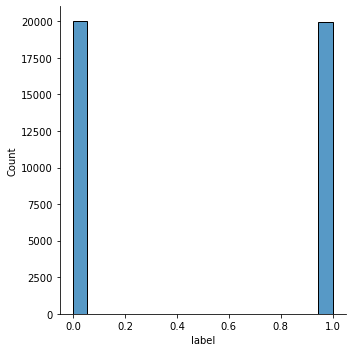

In [9]:
sns.displot(df, x="label")

Checking for any null values, none found in the dataset

In [10]:
df.isnull().sum()

text     0
label    0
dtype: int64

Printing reviews chosen randomly to understand the length and formatting: 

In [15]:
for index, text in enumerate(df['text'][79:83]):
    print(text)

Who could possibly have wished for a sequel to Bert I Gordon is legendary bad trashfilm Food of the Gods Nobody of course but director Damien Lee thought it was a good idea anyway and he put together a belated sequel that stands as one of the most redundant movies in horror history Gnaw is a sequel in name only as the setting moved to a typical late 80 is location a university campus and also the cheap  cheesy gore effects perfectly illustrates the 80 is This script hangs together by clichés awfully written dialogs and plot situations that are not so subtly stolen from other and more successful horror classics Neil Hamilton is a goody two shoes scientist who performs growingexperiments on ordinary rodents in order to do a fellow scientist a favor Due to some incredibly stupid animal rights activists the huge and ravenous rats escape and devour pretty much everyone on campus Following the good old tradition that Spielberg is Jaws started there is an obnoxious Dean who refuses to admit t

The text has a number of line break characters as well as various punctuation marks

Expanding contractions, punctuations and words with numbers present in text using RegEX and removing all line breaks from the text:

In [12]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}
contraction_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contraction_re.sub(replace, text)

def remove_numbers(text):
    re.sub('\w*\d+\w*', '', text, count = -1)
    return text

def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text) #Removes punctuations
    re.sub(' +',' ',text) #Removes extra whitespace
    return text

In [13]:
for ind in df.index:
    review = df['text'][ind]
    review = review.replace('<br />',' ')
    review = expand_contractions(review)
    review = remove_numbers(review)
    review = remove_punctuation(review)
    df['text'][ind] = review

<ipython-input-13-2c9c1ca3e9d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][ind] = review


Next, stopwords are removed so tokens formed are more informative and dataset size is also decreased

In [14]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

Creating a list of all words in lowercase and converting the tokenized words in review to a list.<br />
Documents is a list wherein each element consists of a list of tokenized words and category of review

In [18]:
documents = []
all_words = []
for ind in df.index:
    review = df['text'][ind]
    word_tokens = word_tokenize(review)
    word_in_rev = []
    for w in word_tokens:
        if w.lower() not in stop_words:
            word_in_rev.append(w.lower())
            all_words.append(w.lower())
    category_in_rev = df['label'][ind]
    documents.append((word_in_rev, category_in_rev))

In [19]:
save_documents = open("pickled_algos/documents.pickle", 'wb')
pickle.dump(documents, save_documents)
save_documents.close()

In [20]:
all_words = nltk.FreqDist(all_words)

In [21]:
print(len(all_words))

141853


As part of the exploratory data analysis, plotted the wordcloud for top 250 words in the dataset

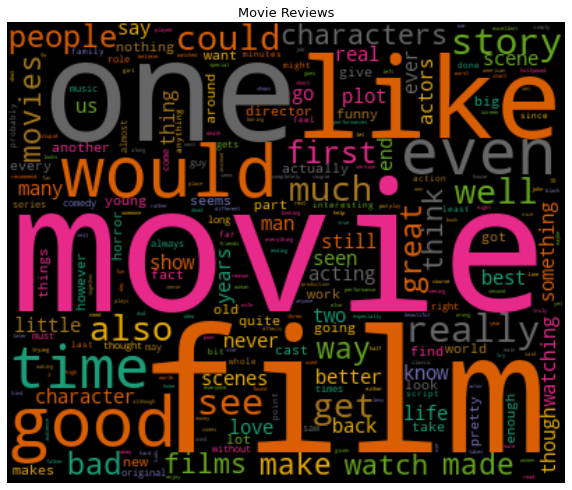

In [22]:
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=250,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,38))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
    
generate_wordcloud(all_words, 'Movie Reviews')

In [23]:
words_as_feats = list(all_words.keys())[:5000]

In [24]:
save_word_features = open("pickled_algos/word_features5k.pickle", 'wb')
pickle.dump(words_as_feats, save_word_features)
save_word_features.close()

In [25]:
def find_features(review):
    words_in_doc = set(review)
    features = {}
    for w in words_as_feats:
        features[w] = (w in words_in_doc)
    return features

In [26]:
featuresets = [(find_features(rev), category) for (rev, category) in documents]

In [27]:
save_features = open("pickled_algos/featuresets.pickle", 'wb')
pickle.dump(featuresets, save_features)
save_features.close()

In [29]:
df_test = pd.read_csv('Test.csv')

for ind in df_test.index:
    review = df_test['text'][ind]
    review = review.replace('<br />',' ')
    review = expand_contractions(review)
    review = remove_numbers(review)
    review = remove_punctuation(review)
    df_test['text'][ind] = review
    
document_test = []

for ind in df_test.index:
    review = df_test['text'][ind]
    word_tokens = word_tokenize(review)
    word_in_rev = []
    for w in word_tokens:
        if w.lower() not in stop_words:
            word_in_rev.append(w.lower())
    category_in_rev = df_test['label'][ind]
    document_test.append((word_in_rev, category_in_rev))
testing_set = [(find_features(rev), category) for (rev, category) in document_test]

<ipython-input-29-f99ce5f277e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text'][ind] = review


In [30]:
clf = nltk.NaiveBayesClassifier.train(featuresets)
print(nltk.classify.accuracy(clf, testing_set))

0.8544


In [31]:
save_clf = open("pickled_algos/ReviewClassifier_NaiveBayes.pickle", 'wb')
pickle.dump(clf, save_clf)
save_clf.close

<function BufferedWriter.close>

In [32]:
clf.show_most_informative_features(20)

Most Informative Features
                     310 = True                0 : 1      =     38.9 : 1.0
                     410 = True                0 : 1      =     35.3 : 1.0
                 stinker = True                0 : 1      =     24.5 : 1.0
                     710 = True                1 : 0      =     20.3 : 1.0
                  wrists = True                0 : 1      =     15.6 : 1.0
                   waste = True                0 : 1      =     14.6 : 1.0
                   grint = True                1 : 0      =     14.4 : 1.0
            decapitation = True                0 : 1      =     14.3 : 1.0
              unengaging = True                0 : 1      =     13.6 : 1.0
                 unfunny = True                0 : 1      =     12.9 : 1.0
                  razzie = True                0 : 1      =     11.4 : 1.0
                concorde = True                0 : 1      =     11.0 : 1.0
                  wayans = True                0 : 1      =     10.4 : 1.0